<a href="https://colab.research.google.com/github/sightes/COFFETALKS/blob/main/Desafio_latam_random_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!unzip "/Rf.zip"

Archive:  /Rf.zip
  inflating: ames_housing.csv        


In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [10]:
df=pd.read_csv('ames_housing.csv').drop('Unnamed: 0',axis=1)

In [11]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

from sklearn.model_selection import train_test_split, GridSearchCV, ParameterGrid
numeric_cols = df.select_dtypes([int, float]).drop(columns = 'Sale_Price')
categorical_cols = df.select_dtypes('O')
y = df.Sale_Price
scaler = StandardScaler().fit(numeric_cols)
ohe = OneHotEncoder(sparse = False, drop = 'first', handle_unknown='ignore').fit(categorical_cols)
categoricals_bin = pd.DataFrame(data = ohe.transform(categorical_cols),columns = ohe.get_feature_names_out() )
numeric_scaled = pd.DataFrame(data = scaler.transform(numeric_cols), columns = scaler.get_feature_names_out())
preproc_df = pd.concat([numeric_scaled, categoricals_bin, y], axis = 1)
x_train, x_test, y_train, y_test = train_test_split(preproc_df.drop(columns = ['Sale_Price']), preproc_df['Sale_Price'],
                                                   test_size = 0.3, random_state=15)


In [23]:
forest=RandomForestRegressor(
    n_estimators=100,max_features='sqrt',
    random_state=15).fit(x_train,y_train)



In [24]:
mean_absolute_error(y_test, forest.predict(x_test))

16377.0498407281

In [47]:
tmp_oob_sqrt,tmp_obb_log2,tmp_obb_none=[],[],[]
estimadores=np.asarray(range(5,100,10)).tolist()
for i in estimadores:
   forest=RandomForestRegressor(
        n_estimators=i,max_features='sqrt',
        random_state=15,oob_score=True).fit(x_train,y_train) 
   forest2=RandomForestRegressor(
        n_estimators=i,max_features='log2',
        random_state=15,oob_score=True).fit(x_train,y_train)
   
   forest3=RandomForestRegressor(
        n_estimators=i,max_features=None,
        random_state=15,oob_score=True).fit(x_train,y_train)      
   tmp_oob_sqrt.append(forest.oob_score_)
   tmp_obb_log2.append(forest2.oob_score_)
   tmp_obb_none.append(forest3.oob_score_)
    

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few tre

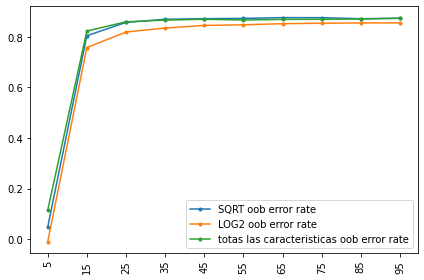

In [48]:

plt.plot(tmp_oob_sqrt,'.-',label='SQRT oob error rate')
plt.plot(tmp_obb_log2,'.-',label='LOG2 oob error rate')

plt.plot(tmp_obb_none,'.-',label='totas las caracteristicas oob error rate')
plt.xticks(range(len(estimadores)),estimadores,rotation=90)
plt.tight_layout()
plt.legend()

In [49]:
[mean_absolute_error(y_test, forest.predict(x_test)),
 mean_absolute_error(y_test, forest2.predict(x_test)),
 mean_absolute_error(y_test, forest3.predict(x_test))]

[16366.756361894497, 17010.72668702473, 17542.07137297168]

In [56]:
cart_params = {'n_estimators':[10,20,30,40,50,70,100,200,300], 
               'max_features': ['sqrt', 'log2', None],
               'max_depth':[10,20,30]}

In [57]:
%%time
grid_cart = GridSearchCV(RandomForestRegressor(random_state=15,oob_score=True),
                         param_grid=cart_params).fit(x_train, y_train)

                    

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few tre

CPU times: user 3min 51s, sys: 629 ms, total: 3min 52s
Wall time: 3min 56s


In [63]:
arbol=grid_cart.best_estimator_

In [59]:
mean_absolute_error(y_test, grid_cart.best_estimator_.predict(x_test))

16293.27906206548

In [64]:
import pickle
# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(arbol, open(filename, 'wb'))
 

In [65]:

# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

In [67]:
loaded_model.predict(x_test)

array([125766.79666667, 143046.09      , 173309.94      , 171204.98      ,
       303321.36666667, 341055.24      , 177883.87      , 137223.02666667,
       318739.31333333, 178043.05      , 149315.47      , 130257.16666667,
       101823.45666667, 181164.56333333, 372356.12      , 251921.57666667,
       125198.09      , 155925.90333333, 145273.06666667, 211804.62666667,
       236230.02      , 210366.63      , 121558.95666667, 178640.95333333,
       165937.33333333, 183222.76333333, 127896.05666667, 136996.        ,
        87355.28      , 163968.67666667, 139474.66666667, 168574.98333333,
       126963.44333333, 140877.9       , 215661.41333333, 107489.77      ,
       187998.4       , 183071.86333333, 132936.72666667, 163023.01      ,
       123511.11666667, 324567.77333333, 198662.11666667, 220539.46      ,
       245766.73666667, 162229.39666667, 356740.42      , 130661.71      ,
       174838.43      , 276859.30333333, 142581.20333333, 113104.84333333,
       184653.91666667, 1